# Wahlomat - Datenanalyse

In [16]:
# importe 
import numpy as np 
import matplotlib.pyplot as plt 
from graph_tool.all import *

In [17]:
# euklidian distance in 38d-space
def calc_euklidian_dist(list1, list2): 
    if len(list1) != len(list2): 
        print("ungleich lange listen, exiting ...")
        return -1
    return np.sqrt( sum([  (list1[i]-list2[i])**2  for i in range(len(list1))] ))


In [18]:
# data (encoded: 1=yes, 2=maybe, 3=no)  
SPD     = [1,3,3,1,3,3,2,3,1,1,1,1,1,1,1,1,2,1,3,1,3,3,1,1,3,3,3,3,1,3,3,1,1,1,3,3,1,1]
CDU     = [1,1,3,3,3,3,1,1,1,1,1,3,2,1,3,3,1,3,1,1,1,3,1,1,3,1,1,1,1,1,1,1,3,1,1,1,2,3]
gruen   = [3,3,1,1,3,1,2,3,1,1,3,1,3,3,2,1,1,3,3,1,1,3,2,1,1,3,3,3,1,3,3,2,1,3,3,3,1,1]
links   = [3,3,3,1,3,1,3,3,1,1,3,1,1,3,1,1,1,1,3,1,3,1,3,1,2,3,3,3,1,3,3,3,1,3,3,3,1,1]
fdp     = [1,1,3,3,1,3,1,3,3,1,1,3,3,1,3,3,3,3,1,3,1,1,1,1,3,3,1,1,3,1,3,1,3,1,1,1,3,1]
afd     = [1,1,3,3,2,3,1,1,3,1,3,3,1,1,3,3,3,3,1,1,3,1,1,1,3,3,1,1,1,1,1,2,3,1,2,1,3,2]
biw     = [1,1,3,1,3,3,1,1,1,1,3,3,1,1,1,3,3,3,1,3,2,3,1,1,3,3,1,3,3,1,3,1,3,1,1,2,3,1]
partei  = [3,1,3,1,1,1,3,3,1,1,3,1,1,3,1,1,1,1,1,3,1,1,3,1,1,3,3,3,1,3,1,1,1,3,3,3,3,1]
piraten = [3,3,3,1,3,1,3,3,1,1,3,1,1,3,1,1,3,1,3,1,3,1,3,1,3,3,3,3,1,3,3,3,1,3,3,3,2,1]
bge     = [3,3,3,1,3,1,1,3,1,1,2,1,1,2,3,1,1,1,3,2,3,1,1,1,3,3,3,3,1,3,1,3,3,3,3,3,1,1]
rechts  = [1,1,3,1,3,3,1,3,1,3,1,3,1,1,1,3,3,1,1,1,3,1,1,3,1,1,3,1,1,1,2,3,1,3,3,1,1,1]
frei    = [3,1,1,3,2,3,1,1,1,3,3,3,3,1,2,2,3,1,1,3,1,1,1,1,3,2,3,3,1,1,1,1,1,1,2,1,3,3]
MenWelt = [3,3,3,1,3,1,2,3,1,2,3,1,1,1,3,1,1,1,3,1,2,1,3,1,3,2,3,3,1,2,3,2,2,3,3,3,3,1]
human   = [2,2,3,1,1,1,1,3,1,1,2,3,1,1,3,2,1,1,1,1,1,2,3,1,3,2,3,2,1,2,1,1,3,1,3,1,2,1]
v3      = [3,3,1,1,3,1,1,3,1,1,3,1,1,3,3,1,1,1,1,1,1,1,2,1,1,3,3,1,1,3,1,3,1,3,3,3,3,1]
WIR     = [3,3,1,1,3,1,1,3,1,1,3,1,1,2,1,1,1,1,3,1,1,1,3,1,3,3,3,1,1,3,1,1,1,1,3,3,1,1]

parteinames =  ["SPD","CDU","gruen","links","fdp","afd","biw","partei","piraten","bge","rechts","frei","MenWelt","human","v3","WIR"]

list_of_lists       = [SPD,CDU,gruen,links,fdp,afd,biw,partei,piraten,bge,rechts,frei,MenWelt,human,v3,WIR]
N_analyzed_parties  = len(list_of_lists)
print("N_analyzed_parties", N_analyzed_parties)
N_fragen = 38

# calculate euklidian distances:
euklidian_distances = np.zeros((N_analyzed_parties, N_analyzed_parties), dtype=float)
for i in range( N_analyzed_parties ):# [SPD,CDU,gruen,links,fdp,afd,biw,partei,piraten,bge,rechts,frei,MenWelt,human,v3,WIR])):
    for j in range( N_analyzed_parties ):  # [SPD,CDU,gruen,links,fdp,afd,biw,partei,piraten,bge,rechts,frei,MenWelt,human,v3,WIR])):
        euklidian_distances[i][j] = calc_euklidian_dist( list_of_lists[i], list_of_lists[j] )

for partei_list in list_of_lists:
    for antwort in range(N_fragen) :
        tmp = [ "J","V","N" ][(partei_list[antwort])-1]
        counter = int(antwort)   + 1 
        partei_list[antwort] = "Q"+str(antwort).zfill(2) + "A" +  tmp


overlap = np.zeros(( N_analyzed_parties ,N_analyzed_parties ), dtype="float")
for i in range( N_analyzed_parties ): 
    for j in range( N_analyzed_parties ):
        if i != j:
            overlap[i][j] = round(len(list( set( list_of_lists[i]).intersection(set( list_of_lists[j] )) ))/N_fragen , 4)
print("test overlap", overlap[10])
        


N_analyzed_parties 16
test overlap [0.5526 0.5    0.3421 0.5    0.4737 0.5    0.4737 0.4474 0.5    0.4737
 0.     0.4474 0.3947 0.4211 0.5    0.4474]


In [19]:
# short test, max overlap
print("test: SPD[2]:", SPD[2], " --- sollte  Q02AN sein")
print(np.max(overlap))
print("max overlap zwischen",parteinames[np.argmax(overlap)%16], "und", parteinames[int(np.argmax(overlap)/16)])

test: SPD[2]: Q02AN  --- sollte  Q02AN sein
0.9211
max overlap zwischen piraten und links


In [20]:
# print all overlaps over 75% to get a first impression
for ii in range(16):
    for jj in range(16): 
        if ii != jj and ii<jj: 
            ovl = round(len(list( set( list_of_lists[ii] ).intersection(set( list_of_lists[jj] )) ))/N_fragen,4)
            if ovl > 0.75:
                print("parteien: ", parteinames[ii], parteinames[jj], ovl)

parteien:  links partei 0.7632
parteien:  links piraten 0.9211
parteien:  links bge 0.7632
parteien:  links WIR 0.7632
parteien:  partei v3 0.7632
parteien:  v3 WIR 0.7895


In [21]:
# initialize graph "diagramm" and its property-maps 
diagramm = graph_tool.Graph()
diagramm.set_directed(False)
# property_maps 
couplings         = diagramm.new_edge_property("float")
couplings_re      = diagramm.new_edge_property("float")
couplings_eukl_38 = diagramm.new_edge_property("float")
couplings_text    = diagramm.new_edge_property("string")
vertex_labels_by_party = diagramm.new_vertex_property("string")          # doubles
couplings = diagramm.new_edge_property("float")

# add vertices and save the descriptors to a list
vertices = []
for xx in parteinames: 
    vertices.append(diagramm.add_vertex())

# assign labels as property-map
for qq in range(len(parteinames)): 
    vertex_labels_by_party[vertices[qq]] = parteinames[qq]

In [22]:
# fill the other property-maps
edge_descriptors = np.zeros((16,16), dtype=np.dtype(object) )
print("test edge_descriptors [1][1] ", edge_descriptors[1][1])
min_overlap = np.amin(overlap)
for vertex1 in diagramm.vertices(): 
    for vertex2 in diagramm.vertices(): 
        # no self-loops
        if vertex1 != vertex2: 
            index1 = parteinames.index(vertex_labels_by_party[vertex1])
            index2 = parteinames.index(vertex_labels_by_party[vertex2])
            if overlap[index1][index2] > 0.5:
                a = diagramm.add_edge(vertex1, vertex2)
                edge_descriptors[ index1 ][ index2 ] = a
                couplings[a] = overlap[index1][index2]
                couplings_re[a] = overlap[index1][index2] - min_overlap
                couplings_text[a] = str(round(100*overlap[index1][index2],1))+"%"
                couplings_eukl_38[a] = euklidian_distances[index1][index2]
            #print("edge_descriptors[ index1 ][ index2 ]", edge_descriptors[ index1 ][ index2 ])


test edge_descriptors [1][1]  0


### Now: different layouts

In [23]:
# use cool spring-layouting algorithm
positions1 = sfdp_layout(diagramm, eweight=couplings)
positions2 = sfdp_layout(diagramm, eweight=couplings_eukl_38)
positions3 = radial_tree_layout(diagramm, vertices[13] , weighted=True)

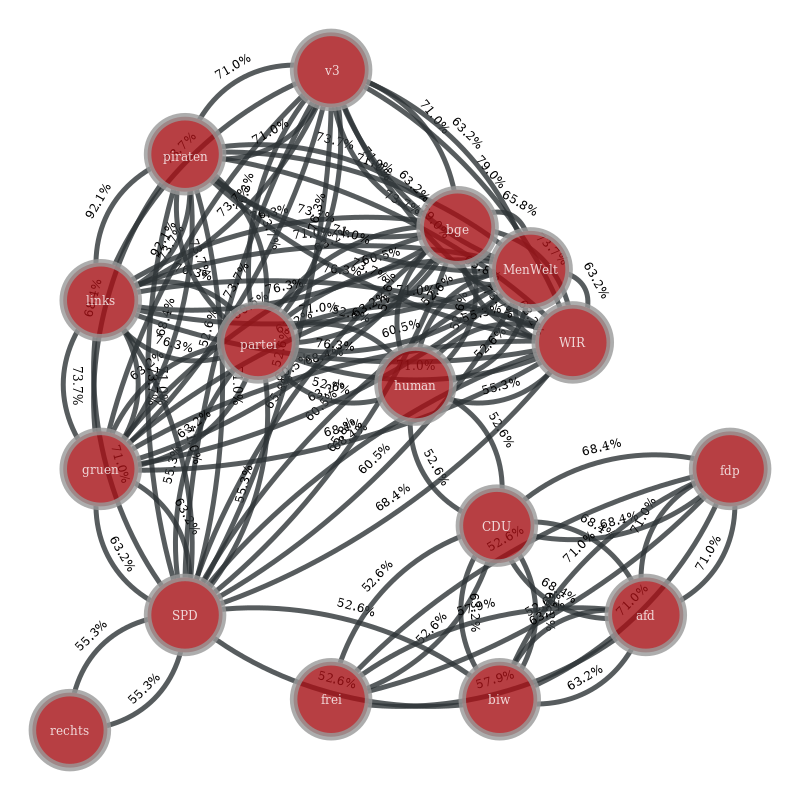

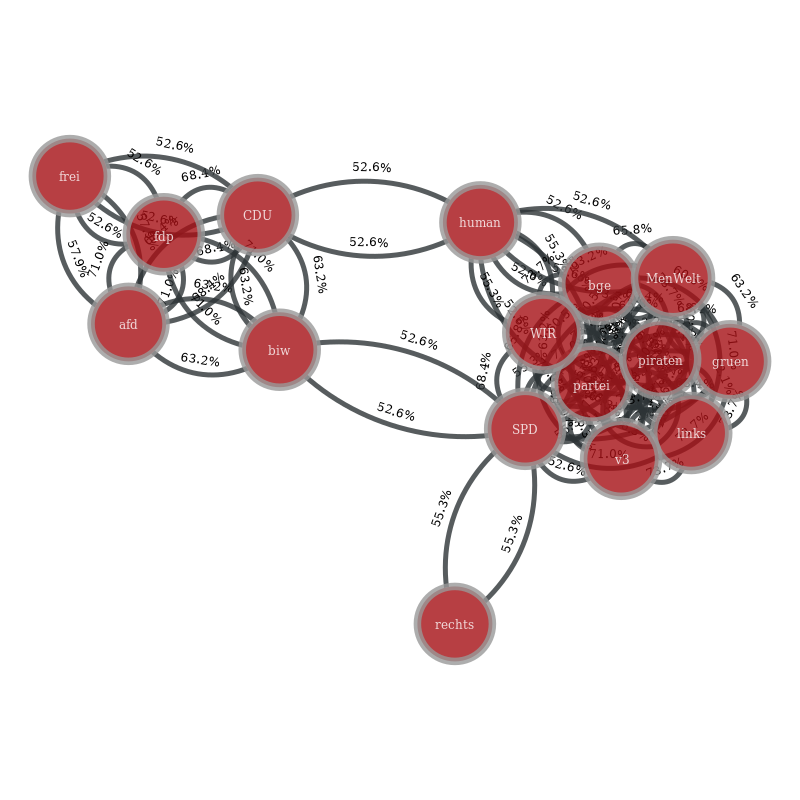

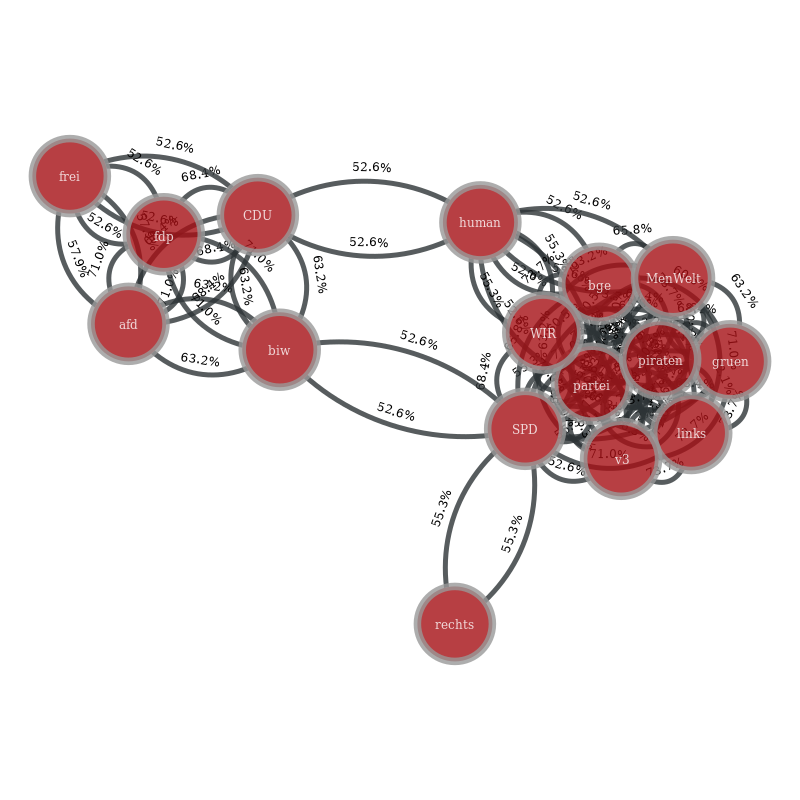

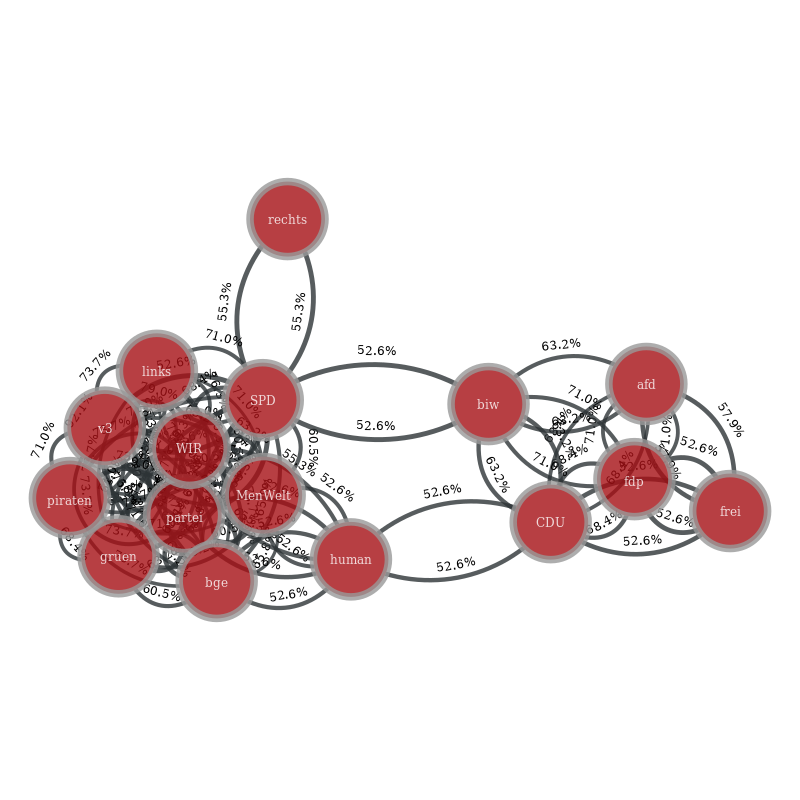

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f2f4595ae10, at 0x7f2f45a34c88>

In [24]:
# plot the whole thing  
graph_draw(diagramm, 
            vertex_text=vertex_labels_by_party, 
            vertex_size=75, 
            output_size=(800,800),
            edge_pen_width=prop_to_size(couplings, mi=5),
            pos=positions3,
            edge_text=couplings_text,
            bg_color=[255,255,255,1],
            )

graph_draw(diagramm, 
            vertex_text=vertex_labels_by_party, 
            vertex_size=75, 
            output_size=(800,800),
            edge_pen_width=prop_to_size(couplings, mi=5),
            pos=positions1,
            edge_text=couplings_text,
            bg_color=[255,255,255,1],
            )

graph_draw(diagramm, 
            vertex_text=vertex_labels_by_party, 
            vertex_size=75, 
            output_size=(800,800),
            edge_pen_width=prop_to_size(couplings_eukl_38),
            pos=positions2,
            edge_text=couplings_text,
            bg_color=[255,255,255,1],
            )

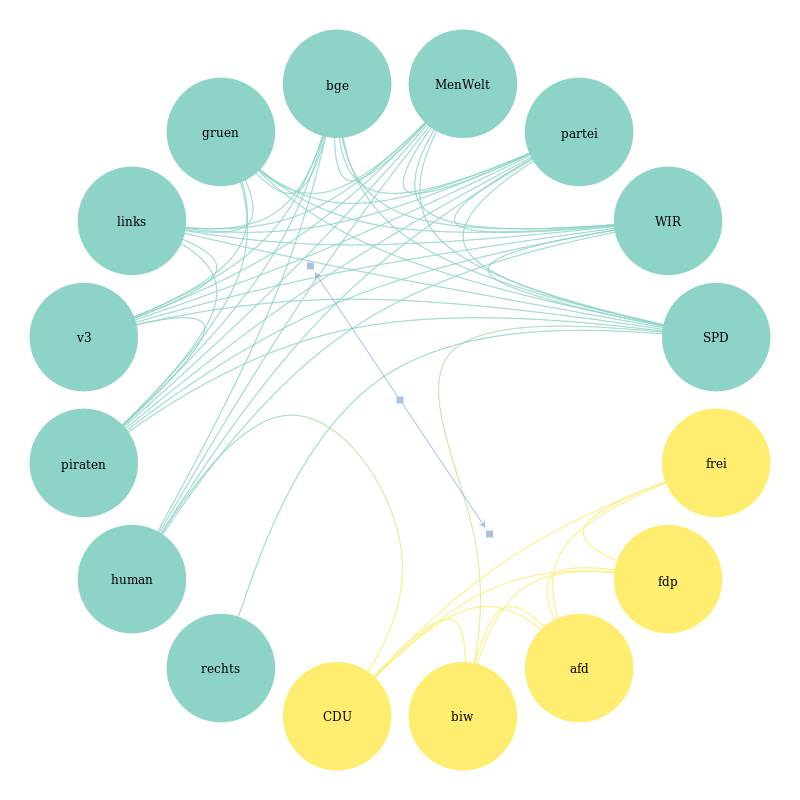

(<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f2f4595ae10, at 0x7f2f46c21dd8>,
 <Graph object, directed, with 19 vertices and 18 edges at 0x7f2f4596b080>,
 <PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f2f4596b080, at 0x7f2f4594ef98>)

In [25]:
# algorithm to find clusters/hierarchy
beta_s = 0.8  # "strength" to be used to investigate clusters
state = minimize_nested_blockmodel_dl(diagramm, deg_corr=True)
draw_hierarchy(state, output="diagramm_nested_model.pdf")
draw_hierarchy(state, output="diagramm_nested_model.png", vertex_text=vertex_labels_by_party, bg_color=[255,255,255,1])
draw_hierarchy(state,beta=beta_s, output_size=(800,800) , 
                   vertex_text=vertex_labels_by_party, 
                   vertex_size=100
)


In [26]:
# UNDER CONSTRUCTION: Principal Component Analysis (when i have the time)
# short googling yields the following:
# from matplotlib.mlab import PCA
# pca = PCA(np.transpose(data))